In [1]:
'''@author: Zi Xian Leong (zxleong@psu.edu) '''

import numpy as np
import matplotlib.pyplot as plt
from random import uniform as rand
import scipy.io as sio
import os
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize
from sklearn.metrics import accuracy_score
from sklearn import preprocessing as pp

from numpy.matlib import repmat

from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import scipy.ndimage.filters as fil
from keras import backend as K
# from skimage.metrics import structural_similarity as ssim
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import savgol_filter
# from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns
from sklearn.metrics import r2_score
from tqdm import tqdm
import scipy.stats
from scipy.signal import tukey
from matplotlib.ticker import FormatStrFormatter
import string
from DLcodes.GPRNet import GPRNet

Using TensorFlow backend.


## See the training progress (Figure 3)

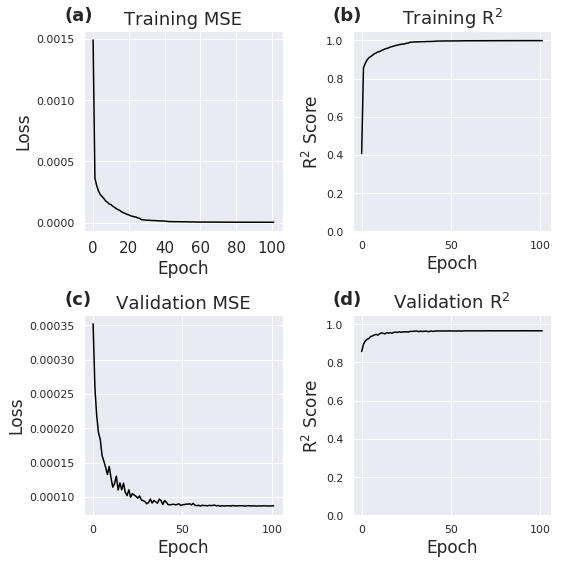

In [3]:
training_log = pd.read_csv('Synthetic/Weights/weight_GPRNet_n16k20.csv')
training_log.head()

mse_loss = training_log['loss']
val_mse_loss = training_log['val_loss']
acc = training_log['R2_score']
val_acc = training_log['val_R2_score']
sns.set_theme(style="darkgrid")
def figure3():
    fig,axs = plt.subplots(2,2,figsize=(8,8))
    sns.set_theme(style="darkgrid")
    ax1 = axs[0,0]
    ax2 = axs[0,1]
    ax3 = axs[1,0]
    ax4 = axs[1,1]
    ax1.plot(mse_loss,color='black')
    ax1.set_xlabel('Epoch', fontsize=17)
    ax1.set_ylabel('Loss', fontsize=17)
    ax1.set_title('Training MSE', fontsize=18)
    ax1.set_xticks(np.arange(0,102,20))
    ax1.set_xticklabels(np.arange(0,102,20),fontsize=15)

    plt.rcParams['xtick.labelsize']=15
    plt.rcParams['ytick.labelsize']=15
    ax1.text(-0.1, 1.05, '('+string.ascii_lowercase[0]+')', transform=ax1.transAxes, size=18, weight='bold')
    
    ax2.plot(acc,color='black')
    ax2.set_ylim([0,1.05])
    ax2.set_xlabel('Epoch', fontsize=17)
    ax2.set_ylabel(r'R$^2$ Score', fontsize=17)
    ax2.set_ylim(0)
    ax2.set_title(r'Training R$^2$', fontsize=18)
    ax2.text(-0.1, 1.05, '('+string.ascii_lowercase[1]+')', transform=ax2.transAxes, size=18, weight='bold')

    ax3.plot(val_mse_loss,color='black')
    ax3.set_xlabel('Epoch', fontsize=17)
    ax3.set_ylabel('Loss', fontsize=17)
    ax3.set_title('Validation MSE', fontsize=18)
    ax3.text(-0.1, 1.05, '('+string.ascii_lowercase[2]+')', transform=ax3.transAxes, size=18, weight='bold')

    ax4.plot(val_acc,color='black')
    ax4.set_ylim([0,1.05])
    ax4.set_xlabel('Epoch', fontsize=17)
    ax4.set_ylabel(r'R$^2$ Score', fontsize=17)
    ax4.set_ylim(0)
    ax4.set_title(r'Validation R$^2$', fontsize=18)
    ax4.text(-0.1, 1.05, '('+string.ascii_lowercase[3]+')', transform=ax4.transAxes, size=18, weight='bold')
    fig.tight_layout()
    
figure3()

## Samples of EM Velocity prediction for 1D synthetic testing data set (Figure 4)


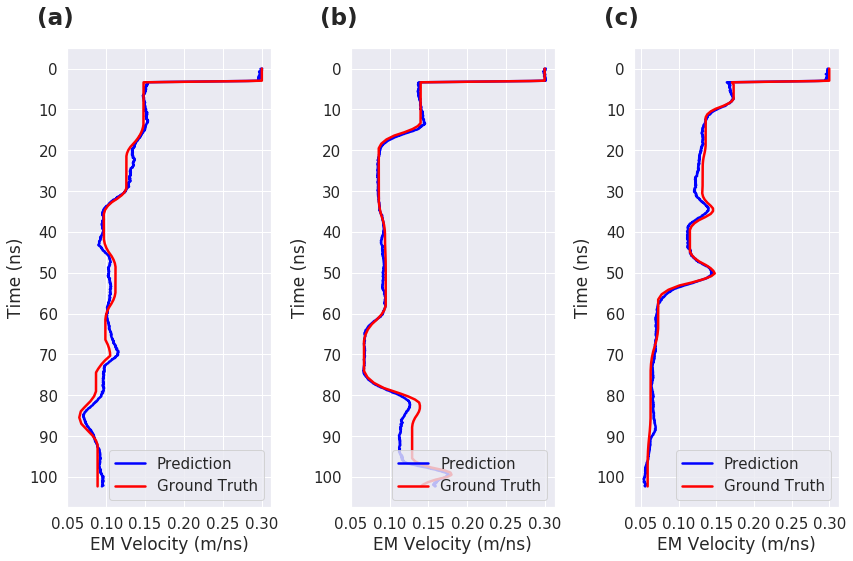

In [4]:
y_True = np.load('Synthetic/Data/1D/ForDL/Synthetic_yTrue_1d.npy') #Ground truth
ypred = np.load('Synthetic/Data/1D/ForDL/Synthetic_ypred_1D.npy') #Velocity Predictions

def figure4():
    seed = 4628
    np.random.seed(seed)
    fig,axs = plt.subplots(1,3,figsize=(12,8))
    fig.tight_layout()
    sns.set_theme(style=None)
    for i in range(3):
        ind = np.random.randint(0,100)
        ax = axs[i]
        ax.invert_yaxis()
        x = np.arange(1280)
        ax.plot(ypred[ind],x,label='Prediction', color='blue', linewidth=2.5)
        ax.plot(y_True[ind],x,label='Ground Truth', color='red', linewidth=2.5)
        ax.set_xlabel('EM Velocity (m/ns)', fontsize=17)
        ax.set_ylabel('Time (ns)', fontsize=17)
        ax.set_xticks(np.arange(0.05,0.35,0.05))
        ax.set_xticklabels(np.arange(0.05,0.35,0.05),fontsize=15)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_yticks(np.arange(0,1300,125))
        ax.set_yticklabels(np.arange(0,110,10),fontsize=15)
        ax.legend(loc=4,fontsize=15)
        ax.text(-0.15, 1.05, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes, size=23, weight='bold')
    fig.tight_layout()
    
figure4()